## Part 2: Structure Learning with **bnstruct**

In this notebook we **construct Bayesian Network structures** from three datasets—**Asia**, **Child**, and a dummy **Ruiz**—using the **bnstruct** package in R. We emulate the **K2** algorithm via a **Hill-Climbing** search with a fixed node ordering and a maximum fan-in.

---

### 1. Problem Formalisation

Given a database $D$ of $N$ cases over variables $X = \{X_1,\dots,X_n\}$, we seek a Directed Acyclic Graph (DAG) $\mathcal{G}$ that maximises a score function:
$$
\mathcal{G}^* = \arg\max_{\mathcal{G}\in\mathrm{DAGs}}\mathrm{Score}(\mathcal{G}\mid D).
$$

- **Nodes**: represent random variables.  
- **Edges**: encode conditional dependencies.  
- **Score**: we use :
    - the **BDeu** score, a Bayesian‐Dirichlet equivalent uniform prior, which balances data fit and model complexity;
    - the **BIC** score, Bayesian Information Criterion, which penalizes complexity;
    - the **AIC** (Akaike Information Criterion).

**K2 algorithm** (Cooper & Herskovits, 1992) is a greedy search that:
1. Requires a **total order** of variables.
2. Iteratively adds parents (from earlier in the order) that improve the score, up to a **max fan-in** (maximum number of parents).

In **bnstruct**, we emulate K2 by calling:
```r
learn.network(..., algo="hc", layering=order, max.fanin=K)

In [1]:
install.packages(
    c(
        "ape",
        "callr",
        "decor",
        "digest",
        "igraphdata",
        "knitr",
        "rgl",
        "rmarkdown",
        "scales",
        "testthat",
        "vdiffr",
        "withr"
    )
)

si installano anche le dipendenze 'brio', 'pkgload'


Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'brio' ha uno stato di uscita non-zero"
Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'decor' ha uno stato di uscita non-zero"
Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'digest' ha uno stato di uscita non-zero"
Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'ape' ha uno stato di uscita non-zero"
Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'rgl' ha uno stato di uscita non-zero"
Warning message in install.packages(c("ape", "callr", "decor", "digest", "igraphdata", :
"l'installazione del pacchetto 'testthat' ha uno stato d

In [2]:
install.packages("tidyverse")

Warning message:
"le dipendenze 'MASS', 'Matrix' non sono disponibili"
si installano anche le dipendenze 'sys', 'bit', 'askpass', 'bit64', 'backports', 'data.table', 'isoband', 'mgcv', 'gargle', 'cellranger', 'curl', 'ids', 'openssl', 'timechange', 'systemfonts', 'textshaping', 'vroom', 'tzdb', 'selectr', 'stringi', 'broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'httr', 'lubridate', 'modelr', 'purrr', 'ragg', 'readr', 'readxl', 'reprex', 'rvest', 'stringr', 'tidyr'


Warning message in install.packages("tidyverse"):
"l'installazione del pacchetto 'sys' ha uno stato di uscita non-zero"
Warning message in install.packages("tidyverse"):
"l'installazione del pacchetto 'bit' ha uno stato di uscita non-zero"
Warning message in install.packages("tidyverse"):
"l'installazione del pacchetto 'backports' ha uno stato di uscita non-zero"
Warning message in install.packages("tidyverse"):
"l'installazione del pacchetto 'data.table' 

In [9]:
library(utils)

In [2]:
# remove.packages()

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("gRbase", "RBGL", "Rgraphviz", "gRain", "png"), force = TRUE)

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.26), R 4.4.3 (2025-02-28)

Old packages: 'QuickJSR', 'RcppParallel', 'abind', 'cli', 'curl', 'data.table',
  'diffobj', 'evaluate', 'fs', 'future', 'future.apply', 'generics', 'ggplot2',
  'gh', 'glmnet', 'globals', 'haven', 'httpuv', 'maps', 'miniUI', 'openssl',
  'parallelly', 'pbdZMQ', 'pkgdown', 'prodlim', 'promises', 'ps', 'quantmod',
  'ragg', 'recipes', 'rlang', 'rstan', 'sass', 'shiny', 'sparsevctrs',
  'systemfonts', 'textshaping', 'tibble', 'tinytex', 'urltools', 'utf8', 'zip',
  'zoo'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: ht

In [ ]:
install.packages("igraph")

In [ ]:
# Asia Dataset
asia_data <- asia()
layering_asia <- seq_len(num.variables(asia_data))
asia_net <- learn.network(
  asia_data,
  algo = "hc",
  scoring.func = "AIK",
  layering = layering_asia,
  max.fanin = 2
)

bnstruct :: scoring function not recognized, using BDeu

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Asia adjacency matrix:
             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     1          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     1       1
X-ray           0            0     0          0          0      0     0       0
Dyspnea         0            0     0          0          0      0     0       0


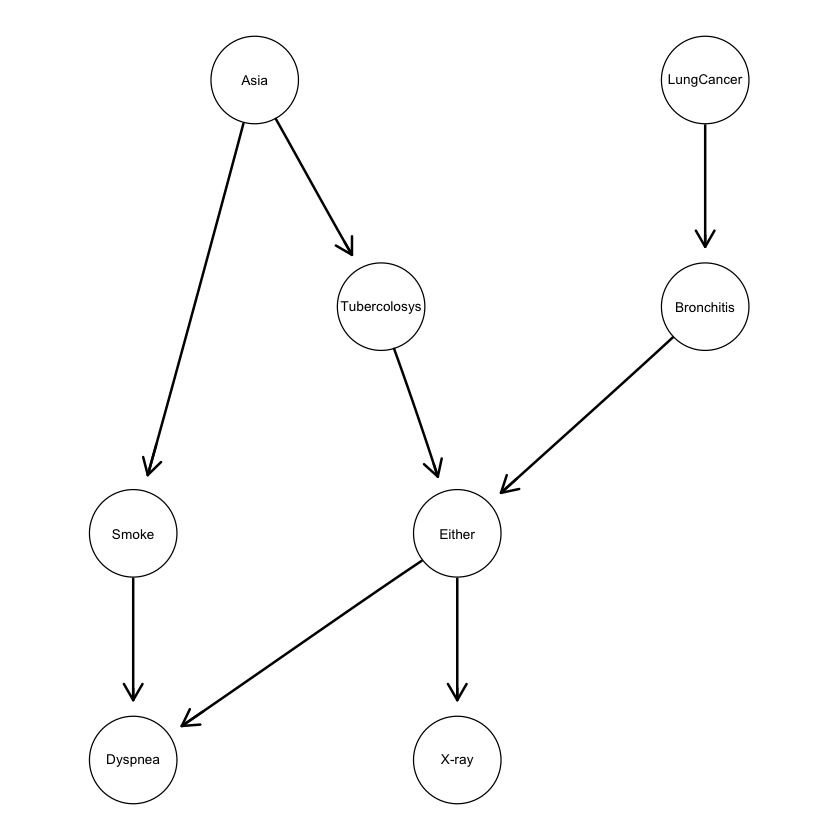

In [ ]:
# Adjacency matrix
cat("Asia adjacency matrix:\n")
print(structure(
  dag(asia_net),
  dimnames = list(variables(asia_net), variables(asia_net))
))

plot(asia_net, main = "Asia DAG")

In [ ]:
# Child Dataset
child_data <- child()
child_data <- impute(child_data)
layering_child <- seq_len(num.variables(child_data))
child_net <- learn.network(
  child_data,
  algo = "hc",
  scoring.func = "AIK",
  layering = layering_child,
  max.fanin = 2,
  use.imputed.data = TRUE
)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.

bnstruct :: scoring function not recognized, using BDeu

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Child adjacency matrix:
               BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       1   0   0        0             0           0
Disease                    0       0   1   1        1             1           1
Age                        0       0   0   0        0             0           0
LVH                        0       0   0   0        0             0           0
DuctFlow                   0       0   0   0        0             0           0
CardiacMixing              0       0   0   0        0             0           0
LungParench                0       0   0   0        0             0           0
LungFlow                   0       0   0   0        0             0           0
Sick                       0       0   0   0        0             0           0
HypDistrib                 0       0   0   0        0             0           0
HypoxiaInO2                0       0   0   0        0             0           0
CO2             

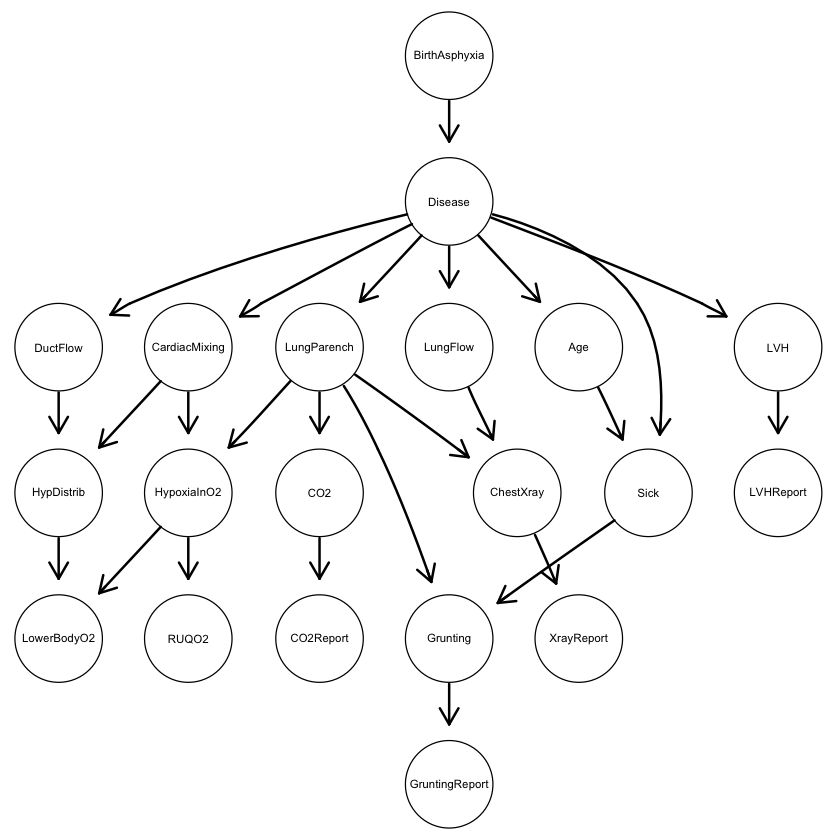

In [ ]:
cat("Child adjacency matrix:\n")
print(structure(
  dag(child_net),
  dimnames = list(variables(child_net), variables(child_net))
))
plot(child_net, main = "Child DAG")

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Ruiz adjacency matrix:
   x1 x2 x3
x1  0  1  0
x2  0  0  1
x3  0  0  0


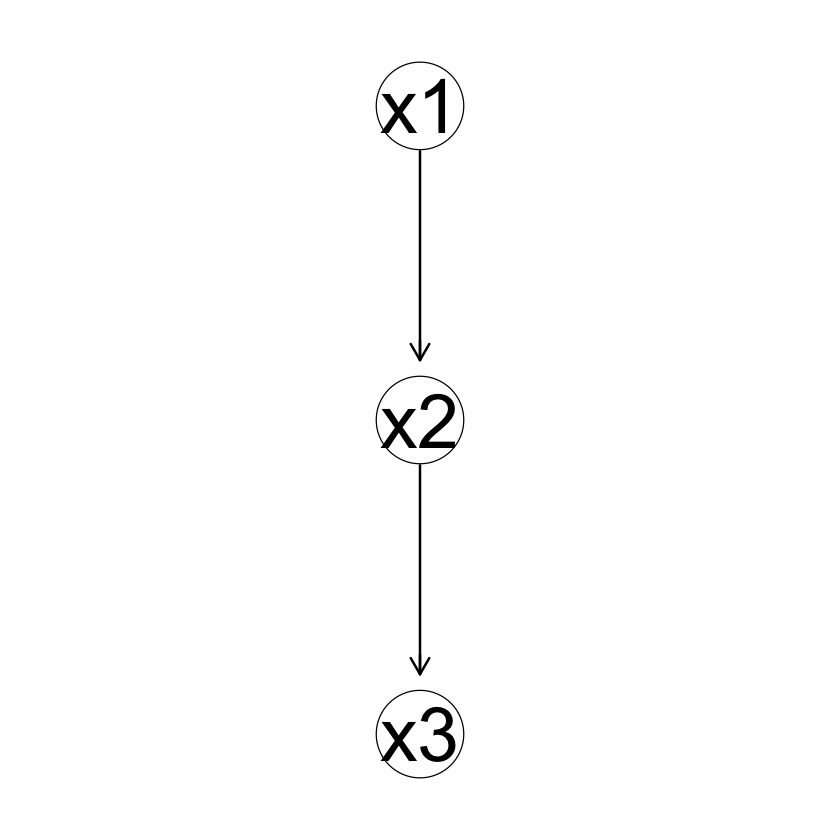

In [ ]:
# Ruiz Dataset
df_ruiz <- data.frame(
  x1 = c(1,1,0,1,0,0,1,0,1,0),
  x2 = c(0,1,0,1,0,1,1,0,1,0),
  x3 = c(0,1,1,1,0,1,1,0,1,0)
)
df_ruiz[] <- df_ruiz + 1

ruiz_data <- BNDataset(
  data = df_ruiz,
  discreteness = c("d","d","d"),
  variables = c("x1","x2","x3"),
  node.sizes = c(2,2,2)
)
layering_ruiz <- seq_len(num.variables(ruiz_data))
ruiz_net <- learn.network(
  ruiz_data,
  algo = "hc",
  scoring.func = "BDeu",
  layering = layering_ruiz,
  max.fanin = 2
)
cat("Ruiz adjacency matrix:\n")
print(structure(
  dag(ruiz_net),
  dimnames = list(variables(ruiz_net), variables(ruiz_net))
))
plot(ruiz_net, main = "Ruiz DAG")